# Problem Statement

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Loading the dataset

In [2]:
#loading the dataset
data = pd.read_csv("/home/santosh/code_git/DSData/loan_prediction.csv")
#printing the head of the data
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
#shape of the data
data.shape

(614, 13)

In [4]:
#checking the data columns
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
#gives the information of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
#A small introduction about dataset
#this dataset is the mixture of categorical and numerical variables

#lets create list of them

#list of categorical variable and Numerical variable

cat_cols = [col for col in data.columns if data[col].dtypes == "object"]
num_cols = [col for col in data.columns if data[col].dtypes != "object"]

print("list of categorical columns are\n\n", cat_cols)
print("--------------------------------------------------------------------")
print("list of numerical columns\n\n", num_cols)


list of categorical columns are

 ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
--------------------------------------------------------------------
list of numerical columns

 ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


# Exploratory Data Analysis

In [7]:
#At first lets chek with numm values
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

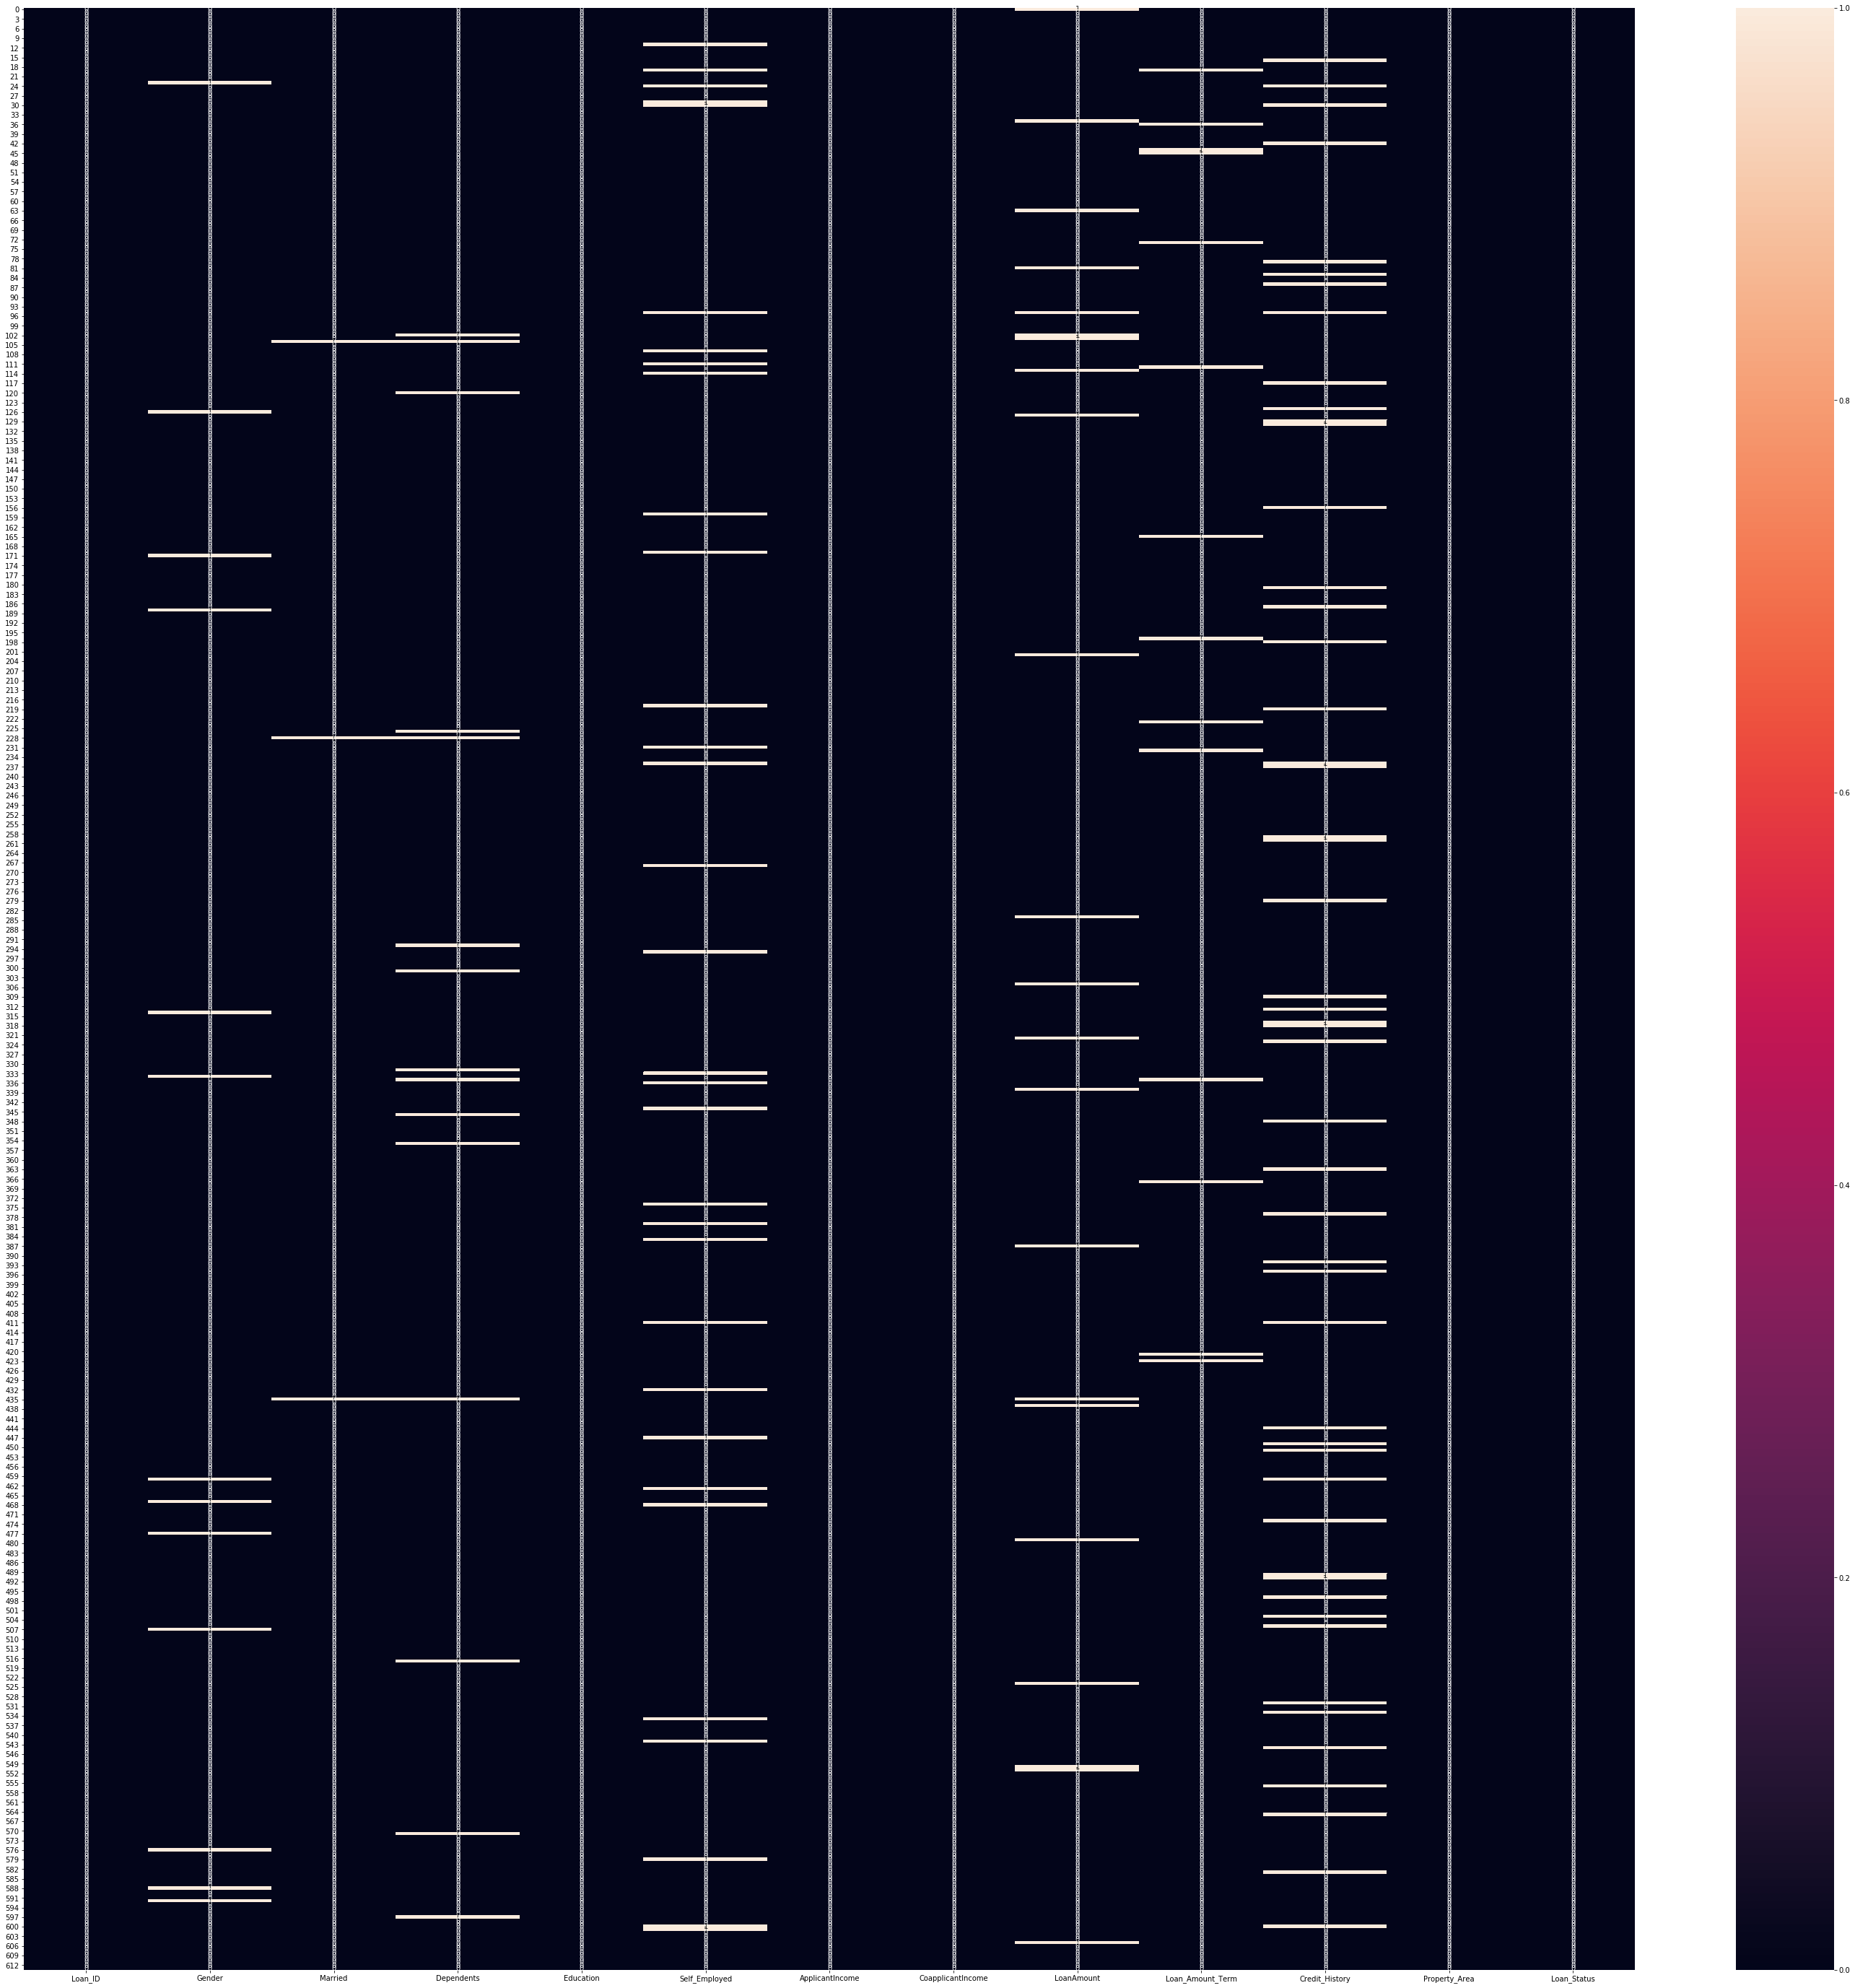

In [8]:
#there are many nu values in both nuemerical and categorical cumns ets represent them using heatmap
plt.figure(figsize=(50, 50))
sns.heatmap(data.isnull(), annot = True)

In [9]:
#As we can see there are decent amount of null values so replace the missing appropriate method
#now we will replace the missing categorical data, 
#as a categorical data so lets replace with the mode value
data.Gender = data.Gender.fillna(data.Gender.mode()[0])
data.Dependents = data.Dependents.fillna(data.Dependents.mode()[0])
data.Self_Employed = data.Self_Employed.fillna(data.Self_Employed.mode()[0])


#now lets deal with the numerical columns, so lets replace them with the mean values

data.LoanAmount = data.LoanAmount.fillna(data.LoanAmount.mean())
data.Loan_Amount_Term = data.Loan_Amount_Term.fillna(data.Loan_Amount_Term.mean())
data.Credit_History = data.Credit_History.fillna(data.Credit_History.mean())



In [10]:
#Lets check for the null data again
data.isnull().sum()

Loan_ID              0
Gender               0
Married              3
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

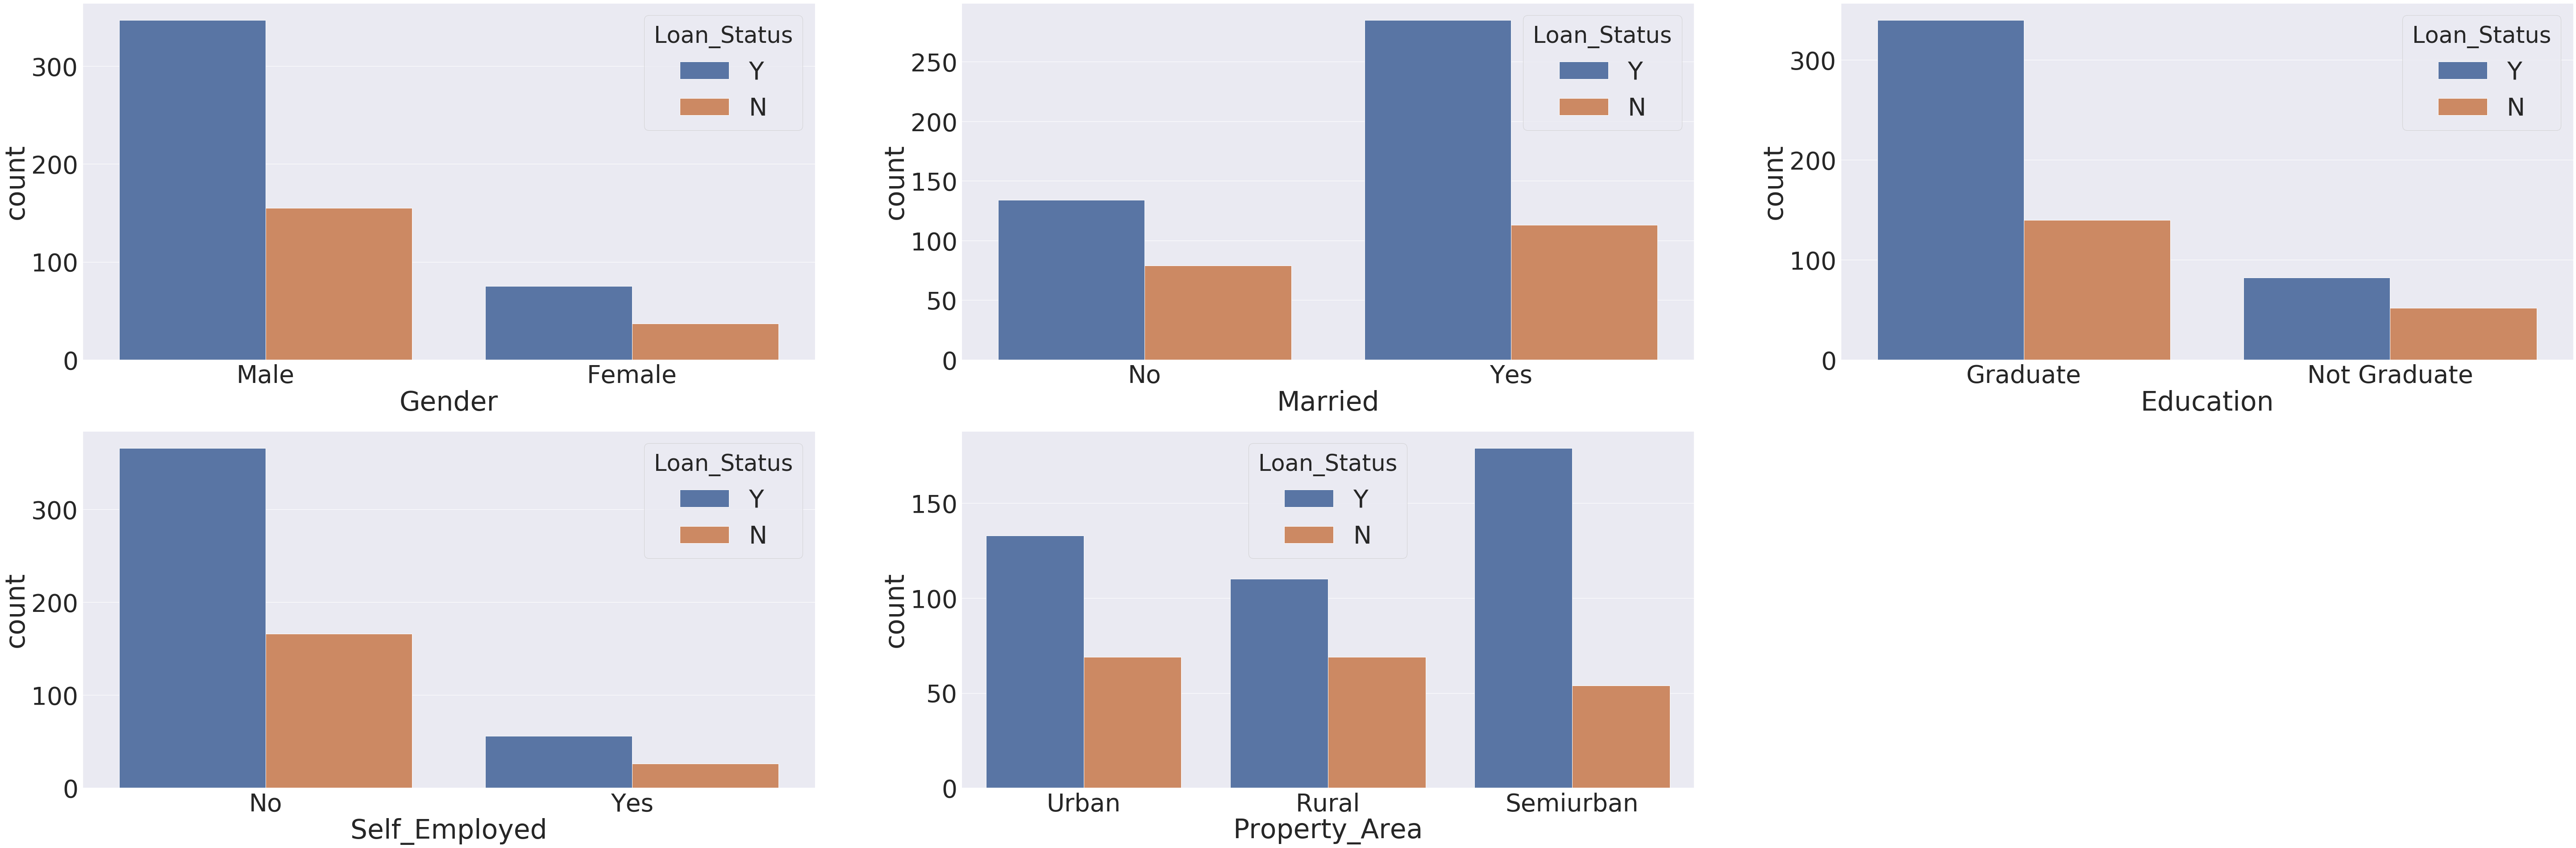

In [11]:
#we have removed all the null values, so lets start with visualization\
#so lets create a count plot for the data against the target variable
plt.figure(figsize = (100, 50))
sns.set(font_scale = 5)
plt.subplot(331)
sns.countplot(data['Gender'],hue=data['Loan_Status'])

plt.subplot(332)
sns.countplot(data['Married'],hue=data['Loan_Status'])

plt.subplot(333)
sns.countplot(data['Education'],hue=data['Loan_Status'])

plt.subplot(334)
sns.countplot(data['Self_Employed'],hue=data['Loan_Status'])

plt.subplot(335)
sns.countplot(data['Property_Area'],hue=data['Loan_Status'])


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f318835a310>,
      dtype=object)

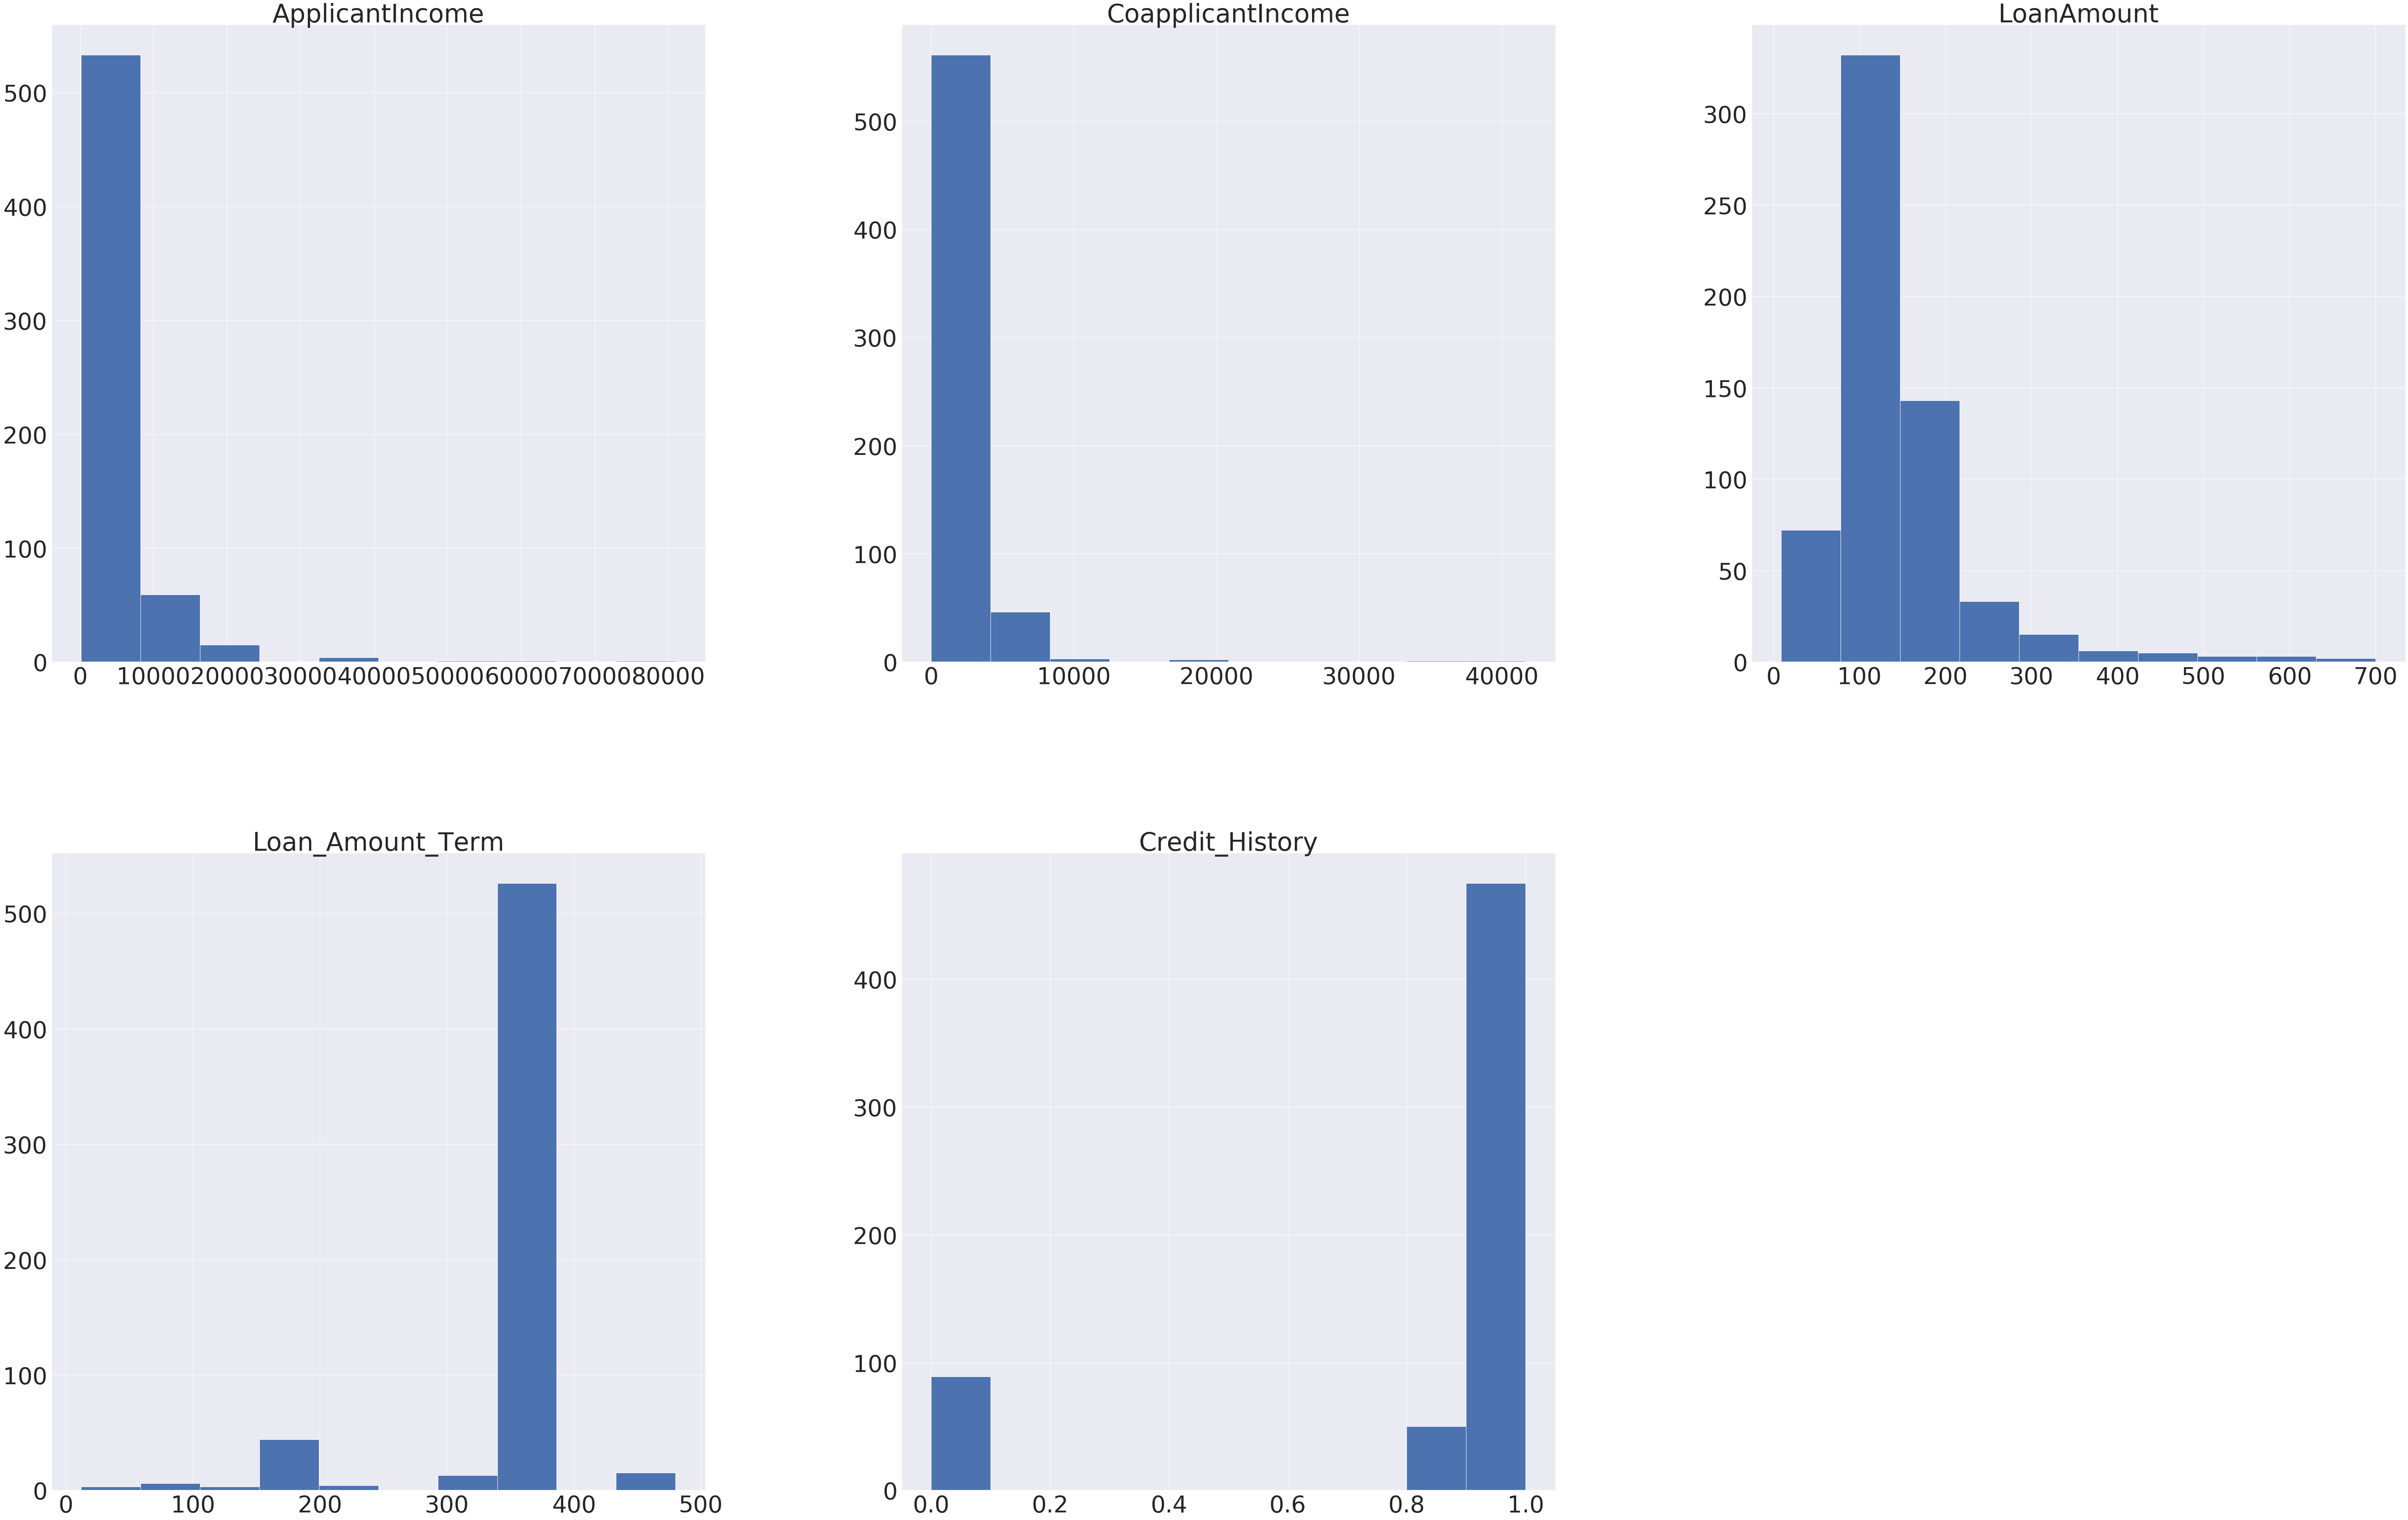

In [12]:
#plotting the hist bar of dataset
data.hist(figsize=(100,100), layout=(3,3), sharex=False)

In [13]:
#applying log transformation for making data into normalized way
for i in num_cols:
    data[i] = np.log(data[i])

In [14]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,8.674026,-inf,4.986426,5.886104,0.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,8.430109,7.318540,4.852030,5.886104,0.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,8.006368,-inf,4.189655,5.886104,0.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,7.856707,7.765569,4.787492,5.886104,0.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,8.699515,-inf,4.948760,5.886104,0.0,Urban,Y


In [15]:
#But there is a lot of inf, -inf values in the dataset lets replace them with nan and convert them
data = data.replace([np.inf, -np.inf], np.nan)

In [16]:
#We can see that we have replaced with nan calues now we will replace those nan values with appropriate method
#we have applied for loop to num_col list we have created and replaced nan values in them
for i in num_cols:
    data[i] = data[i].fillna(data[i].mean())
data.head()


data["Married"] = data["Married"].fillna(data["Married"].mode()[0])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3187fbd610>,
      dtype=object)

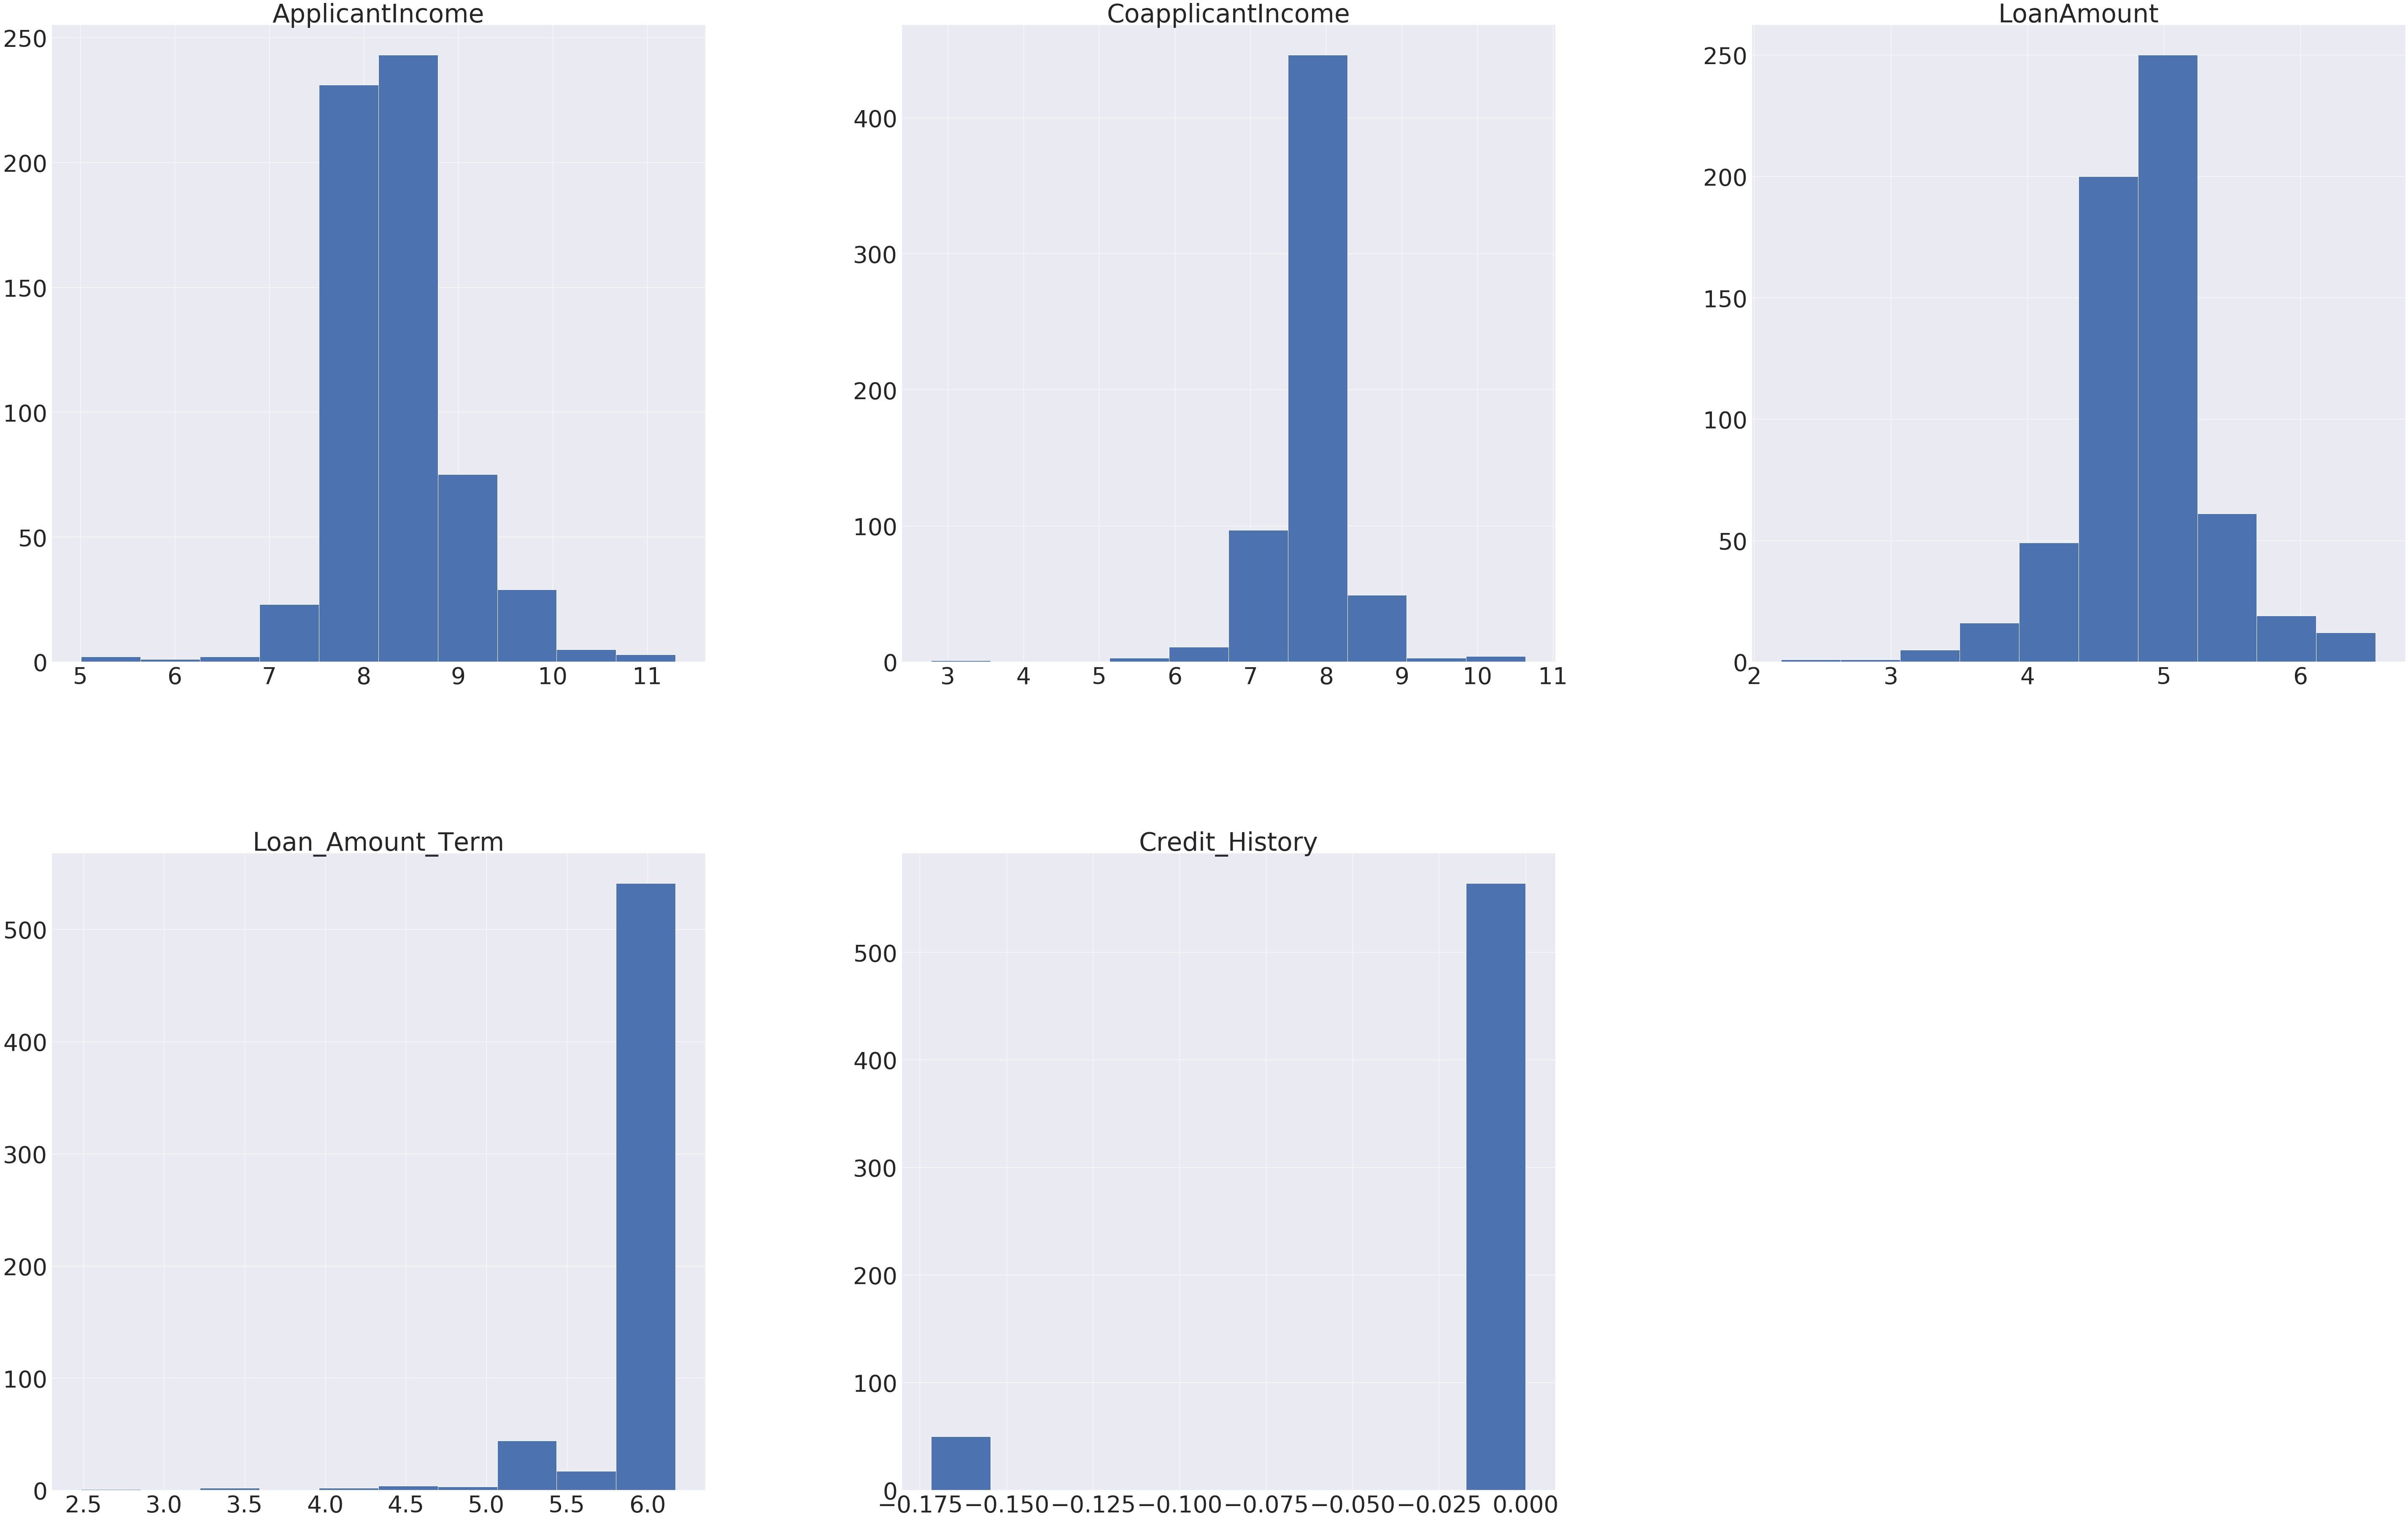

In [17]:
#plotting the hist bar of dataset
data.hist(figsize=(100,100), layout=(3,3), sharex=False)

# outliers

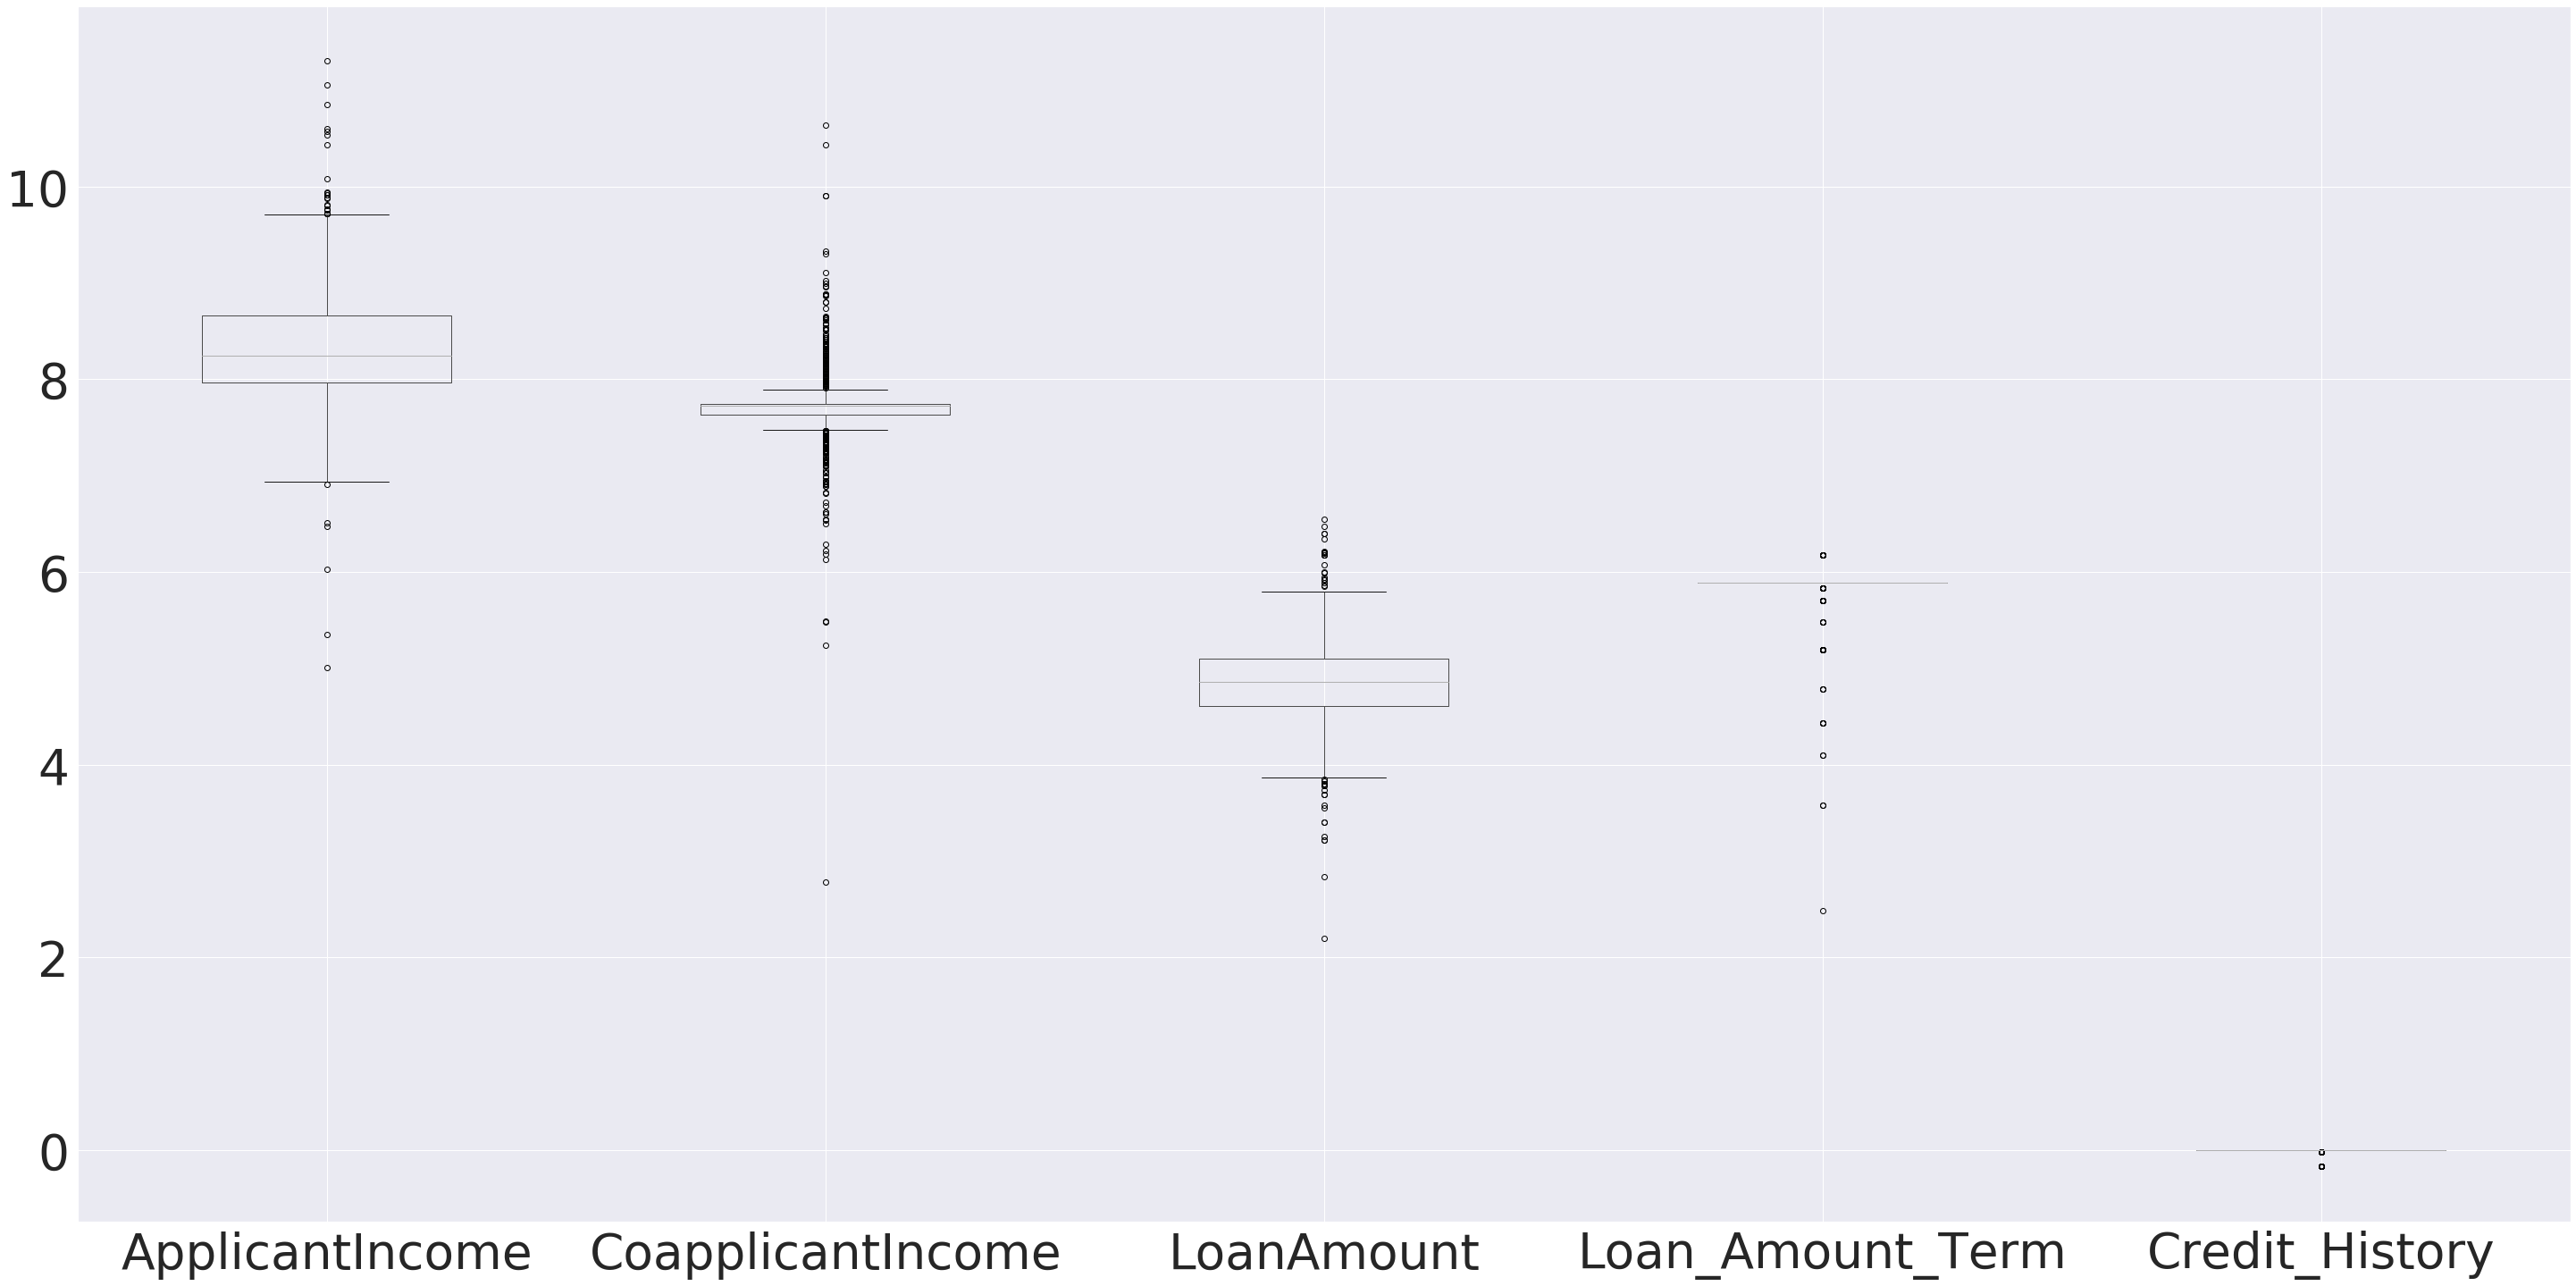

In [18]:
data.boxplot(figsize=[50,30])
plt.subplots_adjust(bottom=0.25)
plt.show()

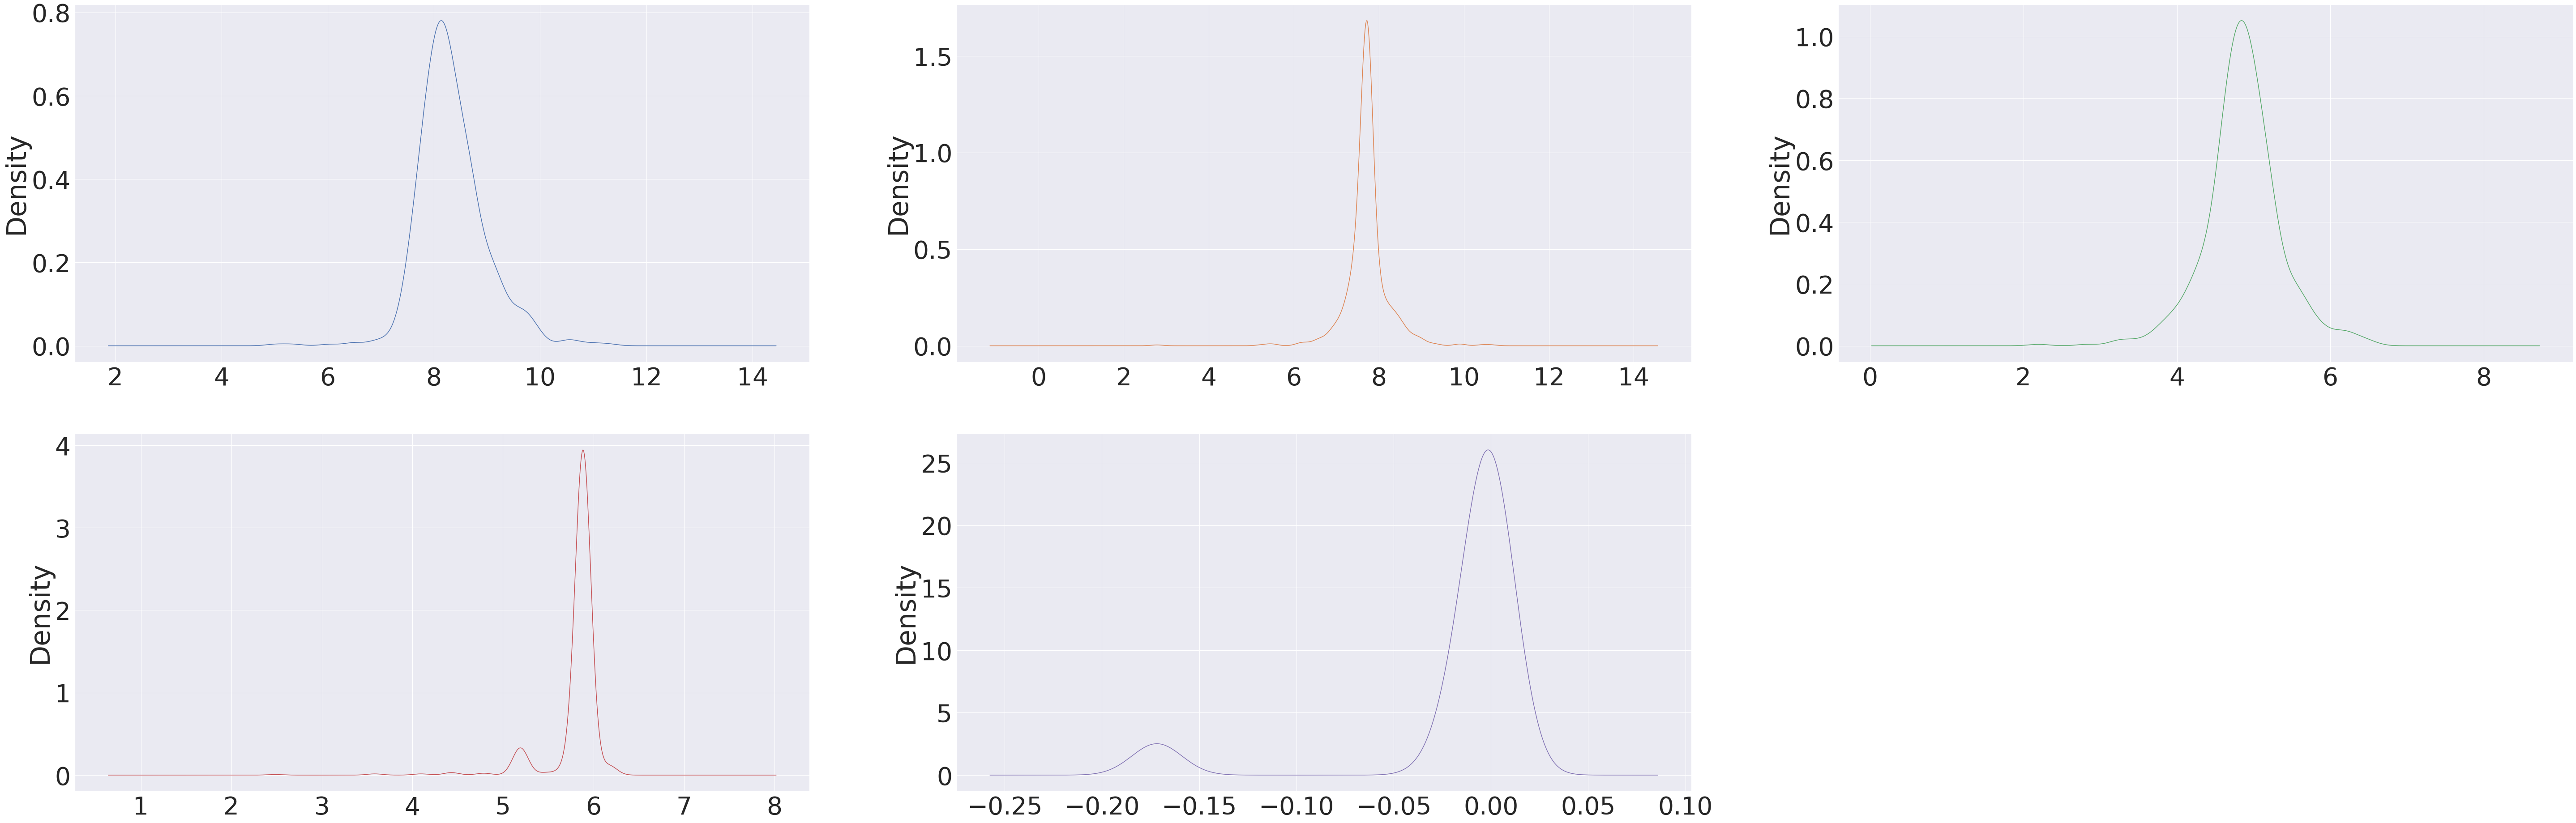

In [19]:
#Plotting the density function
data.plot(kind = 'density', subplots = True, layout = (3,3), sharex = False, legend = False, figsize = (100,50))
plt.show()

# Correlation

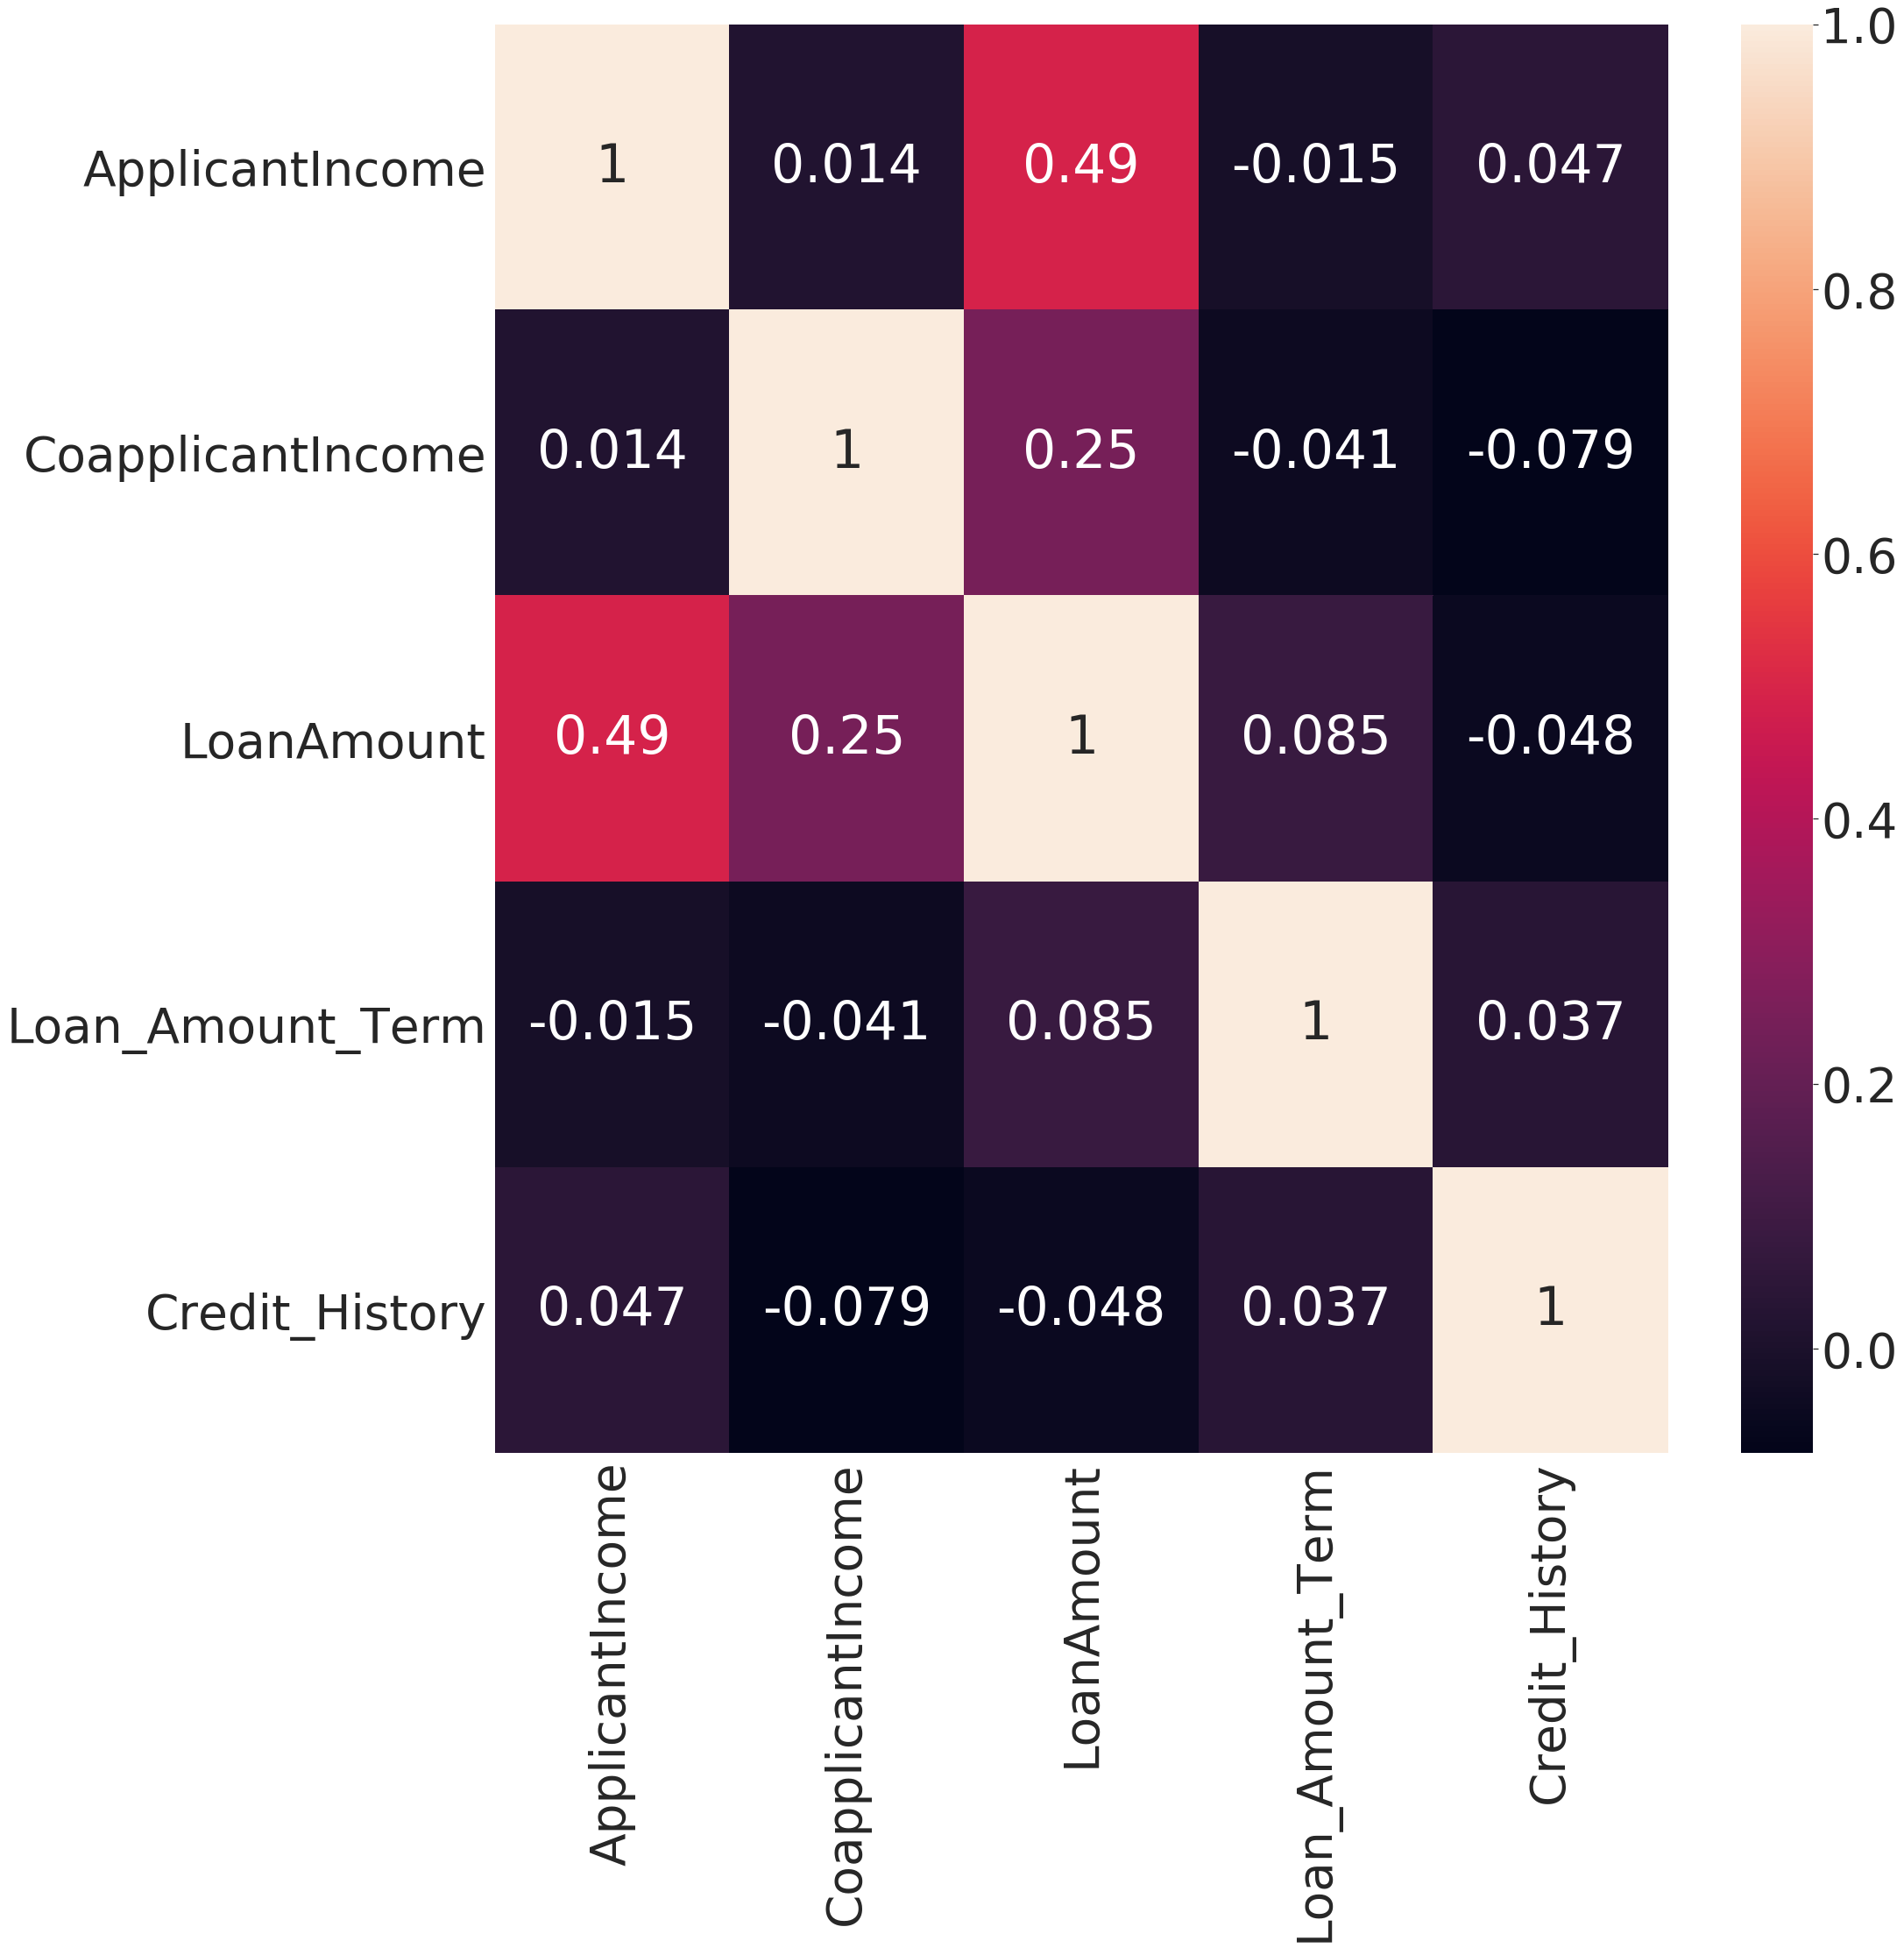

In [20]:
#checking the skewnwss using heatmap
plt.figure(figsize=(30,30))
sns.heatmap(data.corr(), annot = True)

<Figure size 3600x3600 with 0 Axes>

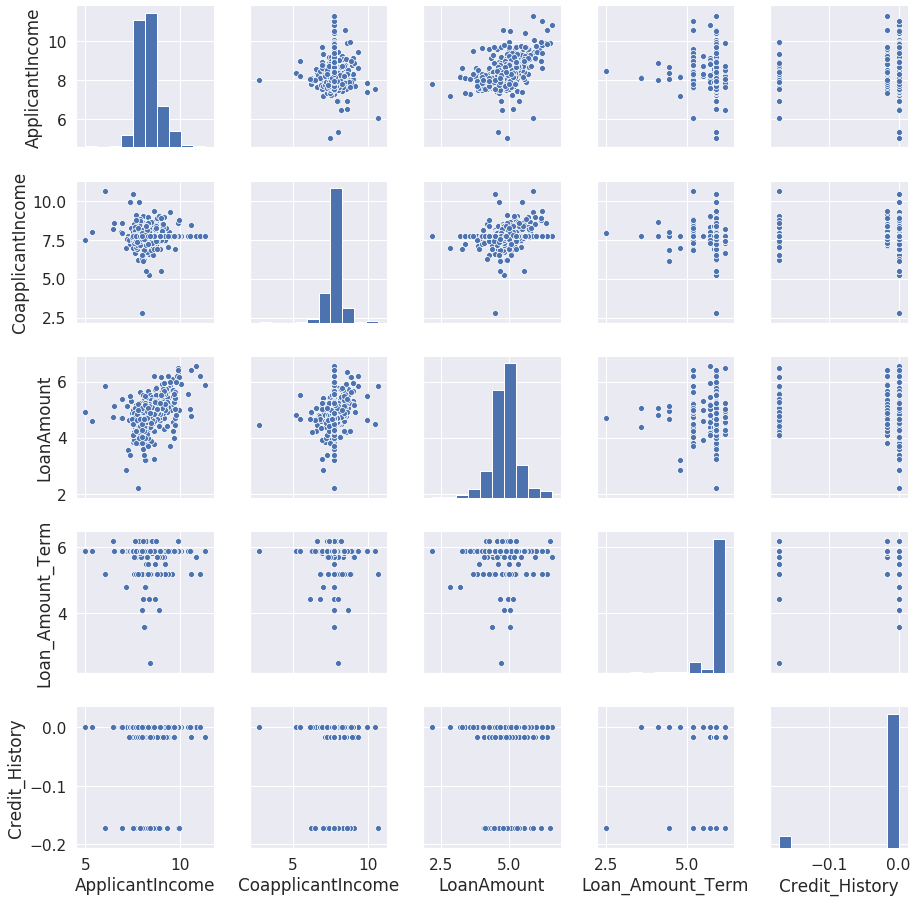

In [21]:
#plotting pairplot
plt.figure(figsize=(50,50))
sns.set(font_scale=1.4)
sns.pairplot(data)

# Feature Engineering

In [22]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,8.674026,7.724036,4.986426,5.886104,0.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,8.430109,7.318540,4.852030,5.886104,0.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,8.006368,7.724036,4.189655,5.886104,0.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,7.856707,7.765569,4.787492,5.886104,0.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,8.699515,7.724036,4.948760,5.886104,0.0,Urban,Y


In [23]:
#creating a loop for the listing of categorical columns
for i in cat_cols:
    print(i)
    print(data[i].value_counts())
    print("-----------------------------------------------------------------")

Loan_ID
LP002531    1
LP001715    1
LP002138    1
LP001644    1
LP001369    1
           ..
LP002288    1
LP002036    1
LP001123    1
LP002226    1
LP001006    1
Name: Loan_ID, Length: 614, dtype: int64
-----------------------------------------------------------------
Gender
Male      502
Female    112
Name: Gender, dtype: int64
-----------------------------------------------------------------
Married
Yes    401
No     213
Name: Married, dtype: int64
-----------------------------------------------------------------
Dependents
0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64
-----------------------------------------------------------------
Education
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
-----------------------------------------------------------------
Self_Employed
No     532
Yes     82
Name: Self_Employed, dtype: int64
-----------------------------------------------------------------
Property_Area
Semiurban    233
Urban        202
R

In [24]:
#we can see there are 2 variables in some columns so lets replace them with 0's and 1's along with the target 
#variable in the dataset
status= { 'Y' : 1, 'N' : 0}
data.Loan_Status = data.Loan_Status.apply(lambda x : status[x])
#now we will continue replcing with other coumns
prop = {'Urban':0, 'Rural':1, 'Semiurban' : 2 }
data.Property_Area = data.Property_Area.apply(lambda x:prop[x])


emp = {'No' : 1, 'Yes' : 0}
data.Self_Employed = data.Self_Employed.apply(lambda x: emp[x])


edu = {'Graduate' : 1, 'Not Graduate' : 0}
data.Education = data.Education.apply(lambda x : edu[x])

dep = {'0' : 0, '1' : 1, '2' : 2, '3+' : 3}
data.Dependents = data.Dependents.apply(lambda x: dep[x])

data.Married = data.Married.apply(lambda x: emp[x])

gender = { 'Male' : 0, 'Female' : 1}
data.Gender = data.Gender.apply(lambda x: gender[x])



In [25]:
#creating a loop for the listing of categorical columns
for i in cat_cols:
    print(i)
    print(data[i].value_counts())
    print("-----------------------------------------------------------------")

Loan_ID
LP002531    1
LP001715    1
LP002138    1
LP001644    1
LP001369    1
           ..
LP002288    1
LP002036    1
LP001123    1
LP002226    1
LP001006    1
Name: Loan_ID, Length: 614, dtype: int64
-----------------------------------------------------------------
Gender
0    502
1    112
Name: Gender, dtype: int64
-----------------------------------------------------------------
Married
0    401
1    213
Name: Married, dtype: int64
-----------------------------------------------------------------
Dependents
0    360
1    102
2    101
3     51
Name: Dependents, dtype: int64
-----------------------------------------------------------------
Education
1    480
0    134
Name: Education, dtype: int64
-----------------------------------------------------------------
Self_Employed
1    532
0     82
Name: Self_Employed, dtype: int64
-----------------------------------------------------------------
Property_Area
2    233
0    202
1    179
Name: Property_Area, dtype: int64
------------------

In [26]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0,1,0,1,1,8.674026,7.724036,4.986426,5.886104,0.000000,0,1
1,LP001003,0,0,1,1,1,8.430109,7.318540,4.852030,5.886104,0.000000,1,0
2,LP001005,0,0,0,1,0,8.006368,7.724036,4.189655,5.886104,0.000000,0,1
3,LP001006,0,0,0,0,1,7.856707,7.765569,4.787492,5.886104,0.000000,0,1
4,LP001008,0,1,0,1,1,8.699515,7.724036,4.948760,5.886104,0.000000,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,1,1,0,1,1,7.972466,7.724036,4.262680,5.886104,0.000000,1,1
610,LP002979,0,0,3,1,1,8.320205,7.724036,3.688879,5.192957,0.000000,1,1
611,LP002983,0,0,1,1,1,8.996157,5.480639,5.533389,5.886104,0.000000,0,1
612,LP002984,0,0,2,1,1,8.933664,7.724036,5.231109,5.886104,0.000000,0,1


# Feature Scaling

In [27]:
from sklearn.preprocessing import LabelEncoder
#applying label encoding 
data = data.apply(LabelEncoder().fit_transform)
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,1,0,1,1,376,151,100,9,2,0,1
1,1,0,0,1,1,1,306,59,81,9,2,1,0
2,2,0,0,0,1,0,139,151,26,9,2,0,1
3,3,0,0,0,0,1,90,160,73,9,2,0,1
4,4,0,1,0,1,1,381,151,94,9,2,0,1


In [28]:
#dividing dependent and independent variables
x = data.drop(["Loan_Status"],axis = 1)
y = data["Loan_Status"]
print(x.shape,y.shape)

(614, 12) (614,)


In [29]:
from sklearn.preprocessing import RobustScaler
scalar = RobustScaler()
mine = pd.DataFrame(scalar.fit_transform(x), columns=x.columns)
x = mine

In [30]:
from sklearn.preprocessing import power_transform
power = pd.DataFrame(power_transform(x, method = "yeo-johnson"), columns=x.columns)
x = power

In [31]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
new = pd.DataFrame(scale.fit_transform(x), columns=x.columns)
x = new

# Model creation

In [32]:
#importing necessary libraries
from sklearn.model_selection import train_test_split, KFold, cross_val_score,GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier


In [33]:
#spliting the data into test and train
x_train,x_test,y_train,y_test = train_test_split(x, y, random_state = 100, test_size = 0.33)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(411, 12) (203, 12) (411,) (203,)


In [34]:
#now checking the cross_val_score of models to get the best model 
models = []
models.append(('LR', LogisticRegression()))
models.append(('N', GaussianNB()))
models.append(('DEC', DecisionTreeClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVC', SVC()))
models.append(('RAN', RandomForestClassifier()))
models.append(('ADA', AdaBoostClassifier()))

results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, random_state=100)
    cv_results = cross_val_score(model, x, y, cv=kfold, scoring='accuracy')
    
    results.append(cv_results)
    names.append(name)
    
    msg = '%s: %f, %f' % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.762242, 0.039754
N: 0.768826, 0.043127
DEC: 0.703887, 0.066510
KNN: 0.716737, 0.040172
SVC: 0.760603, 0.042768
RAN: 0.793390, 0.052105
ADA: 0.744897, 0.136841


In [35]:
#creating the model instances
guassian = GaussianNB()
randomforest = RandomForestClassifier()


In [45]:
model = []
model.append(('random_forest', RandomForestClassifier()))
model.append(('guassian', GaussianNB()))

for n, m in model:
    m.fit(x_train,y_train)
    prediction = m.predict(x_test)
    print("accuracy score of {} is {:.2f}".format(n,accuracy_score(y_test, prediction)*100))
    print(confusion_matrix(y_test, prediction))
    print(classification_report(y_test, prediction))
    print("----------------------------------------------------------------------------------")
    print('\n')
             
             

accuracy score of random_forest is 76.85
[[ 30  37]
 [ 10 126]]
              precision    recall  f1-score   support

           0       0.75      0.45      0.56        67
           1       0.77      0.93      0.84       136

    accuracy                           0.77       203
   macro avg       0.76      0.69      0.70       203
weighted avg       0.77      0.77      0.75       203

----------------------------------------------------------------------------------


accuracy score of guassian is 72.91
[[ 32  35]
 [ 20 116]]
              precision    recall  f1-score   support

           0       0.62      0.48      0.54        67
           1       0.77      0.85      0.81       136

    accuracy                           0.73       203
   macro avg       0.69      0.67      0.67       203
weighted avg       0.72      0.73      0.72       203

----------------------------------------------------------------------------------




# Hyper parameter tuning

In [46]:
#setting parameter list for hyper parameter tuning
randomforest_params = {
    'criterion' : ['gini', 'entropy'],
    'n_estimators' : [0.1, 10, 20, 30, 100],
    'max_depth' : [5, 8, 15, 25, 30],
    'bootstrap' : [True, False]
}

In [47]:
#applying gridsearch CV on the parameter ,model and with the cross validation
Grid1 = GridSearchCV(randomforest, randomforest_params, cv=5)

#fitiing the model
Grid1.fit(x_train,y_train)

#printing best params
print(Grid1.best_params_)

{'bootstrap': True, 'criterion': 'gini', 'max_depth': 5, 'n_estimators': 100}


0.7536945812807881
[[ 28  39]
 [ 11 125]]
              precision    recall  f1-score   support

           0       0.72      0.42      0.53        67
           1       0.76      0.92      0.83       136

    accuracy                           0.75       203
   macro avg       0.74      0.67      0.68       203
weighted avg       0.75      0.75      0.73       203



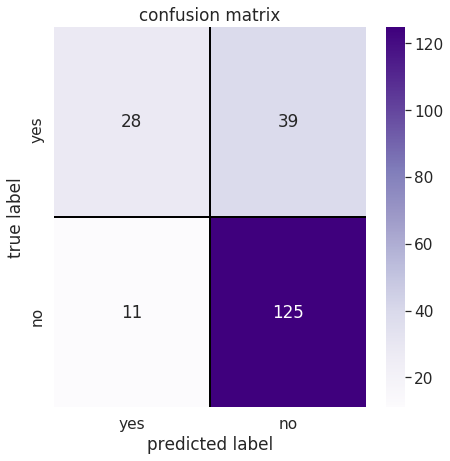

In [52]:
#getting predictions using tuned model
prediction = Grid1.predict(x_test)
print(accuracy_score(y_test, prediction))
print(confusion_matrix(y_test, prediction))
print(classification_report(y_test, prediction))

#ploting the confusion matrix
cm1 = confusion_matrix(y_test, prediction)
x_labe = ["yes", "no"]
y_labe = ["yes", "no"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm1, annot=True, linewidths=0.2, linecolor="black", fmt = ".0f", ax = ax, cmap="Purples", xticklabels=x_labe, yticklabels=y_labe)
plt.title("confusion matrix")
plt.xlabel("predicted label")
plt.ylabel("true label")
plt.show()

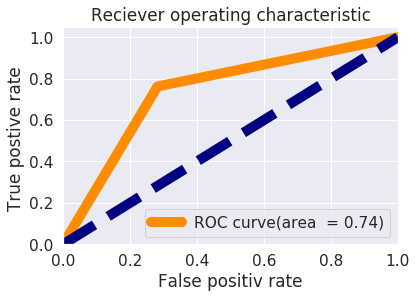

In [53]:
#ploting the auc-roc curve
from sklearn.metrics import roc_curve, auc
fpr, tpr, threshold = roc_curve(prediction, y_test)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr ,tpr, color='darkorange', lw=10, label='ROC curve(area  = %0.2f)' %roc_auc)
plt.plot([0,1],[0,1],color = 'navy', lw = 10, linestyle = '--')
plt.xlim([0.0 , 1.0])
plt.ylim([0.0 , 1.05])
plt.xlabel("False positiv rate")
plt.ylabel("True postive rate ")
plt.title("Reciever operating characteristic")
plt.legend(loc = "lower right")
plt.show()

# Saving the model

In [54]:
#saving the model
import joblib
joblib.dump(randomforest, "Randomforestmodel.obj")

['Randomforestmodel.obj']

In [55]:
#loading the model
model1 = joblib.load("Randomforestmodel.obj")

# Conclusion

In [56]:
#lets test this model on test data
#creating submission data
a = np.array(y_test)
model1.fit(x_train, y_train)
predicted = np.array(model1.predict(x_test))
submission = pd.DataFrame({'original' : a, 'predicted': predicted})

In [57]:
submission

,original,predicted
0,1,0
1,1,0
2,0,1
3,1,1
4,1,0
...,...,...
198,1,1
199,1,1
200,0,1
201,0,0
